In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
Fraud=pd.read_csv("C:\\Users\\admin\\Downloads\\Assignment 11\\Fraud_check (1).csv")

In [3]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
Fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
Fraud.shape

(600, 6)

In [7]:
Fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder()
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad']) 
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status']) 
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban']) 

In [9]:
Fraud1=Fraud
Fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
x=Fraud1.drop(['Undergrad'], axis=1)
y=Fraud1[['Undergrad']]
x.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,2,68833,50047,10,1
1,0,33700,134075,18,1
2,1,36925,160205,30,1
3,2,50190,193264,15,1
4,1,81002,27533,28,0


# Building Decision Tree Classifier using Entropy Criteria

In [11]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=28)

In [12]:
Fraud_model= DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
Fraud_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

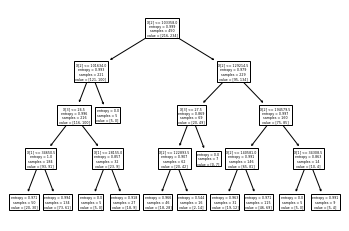

In [13]:
tree.plot_tree(Fraud_model);

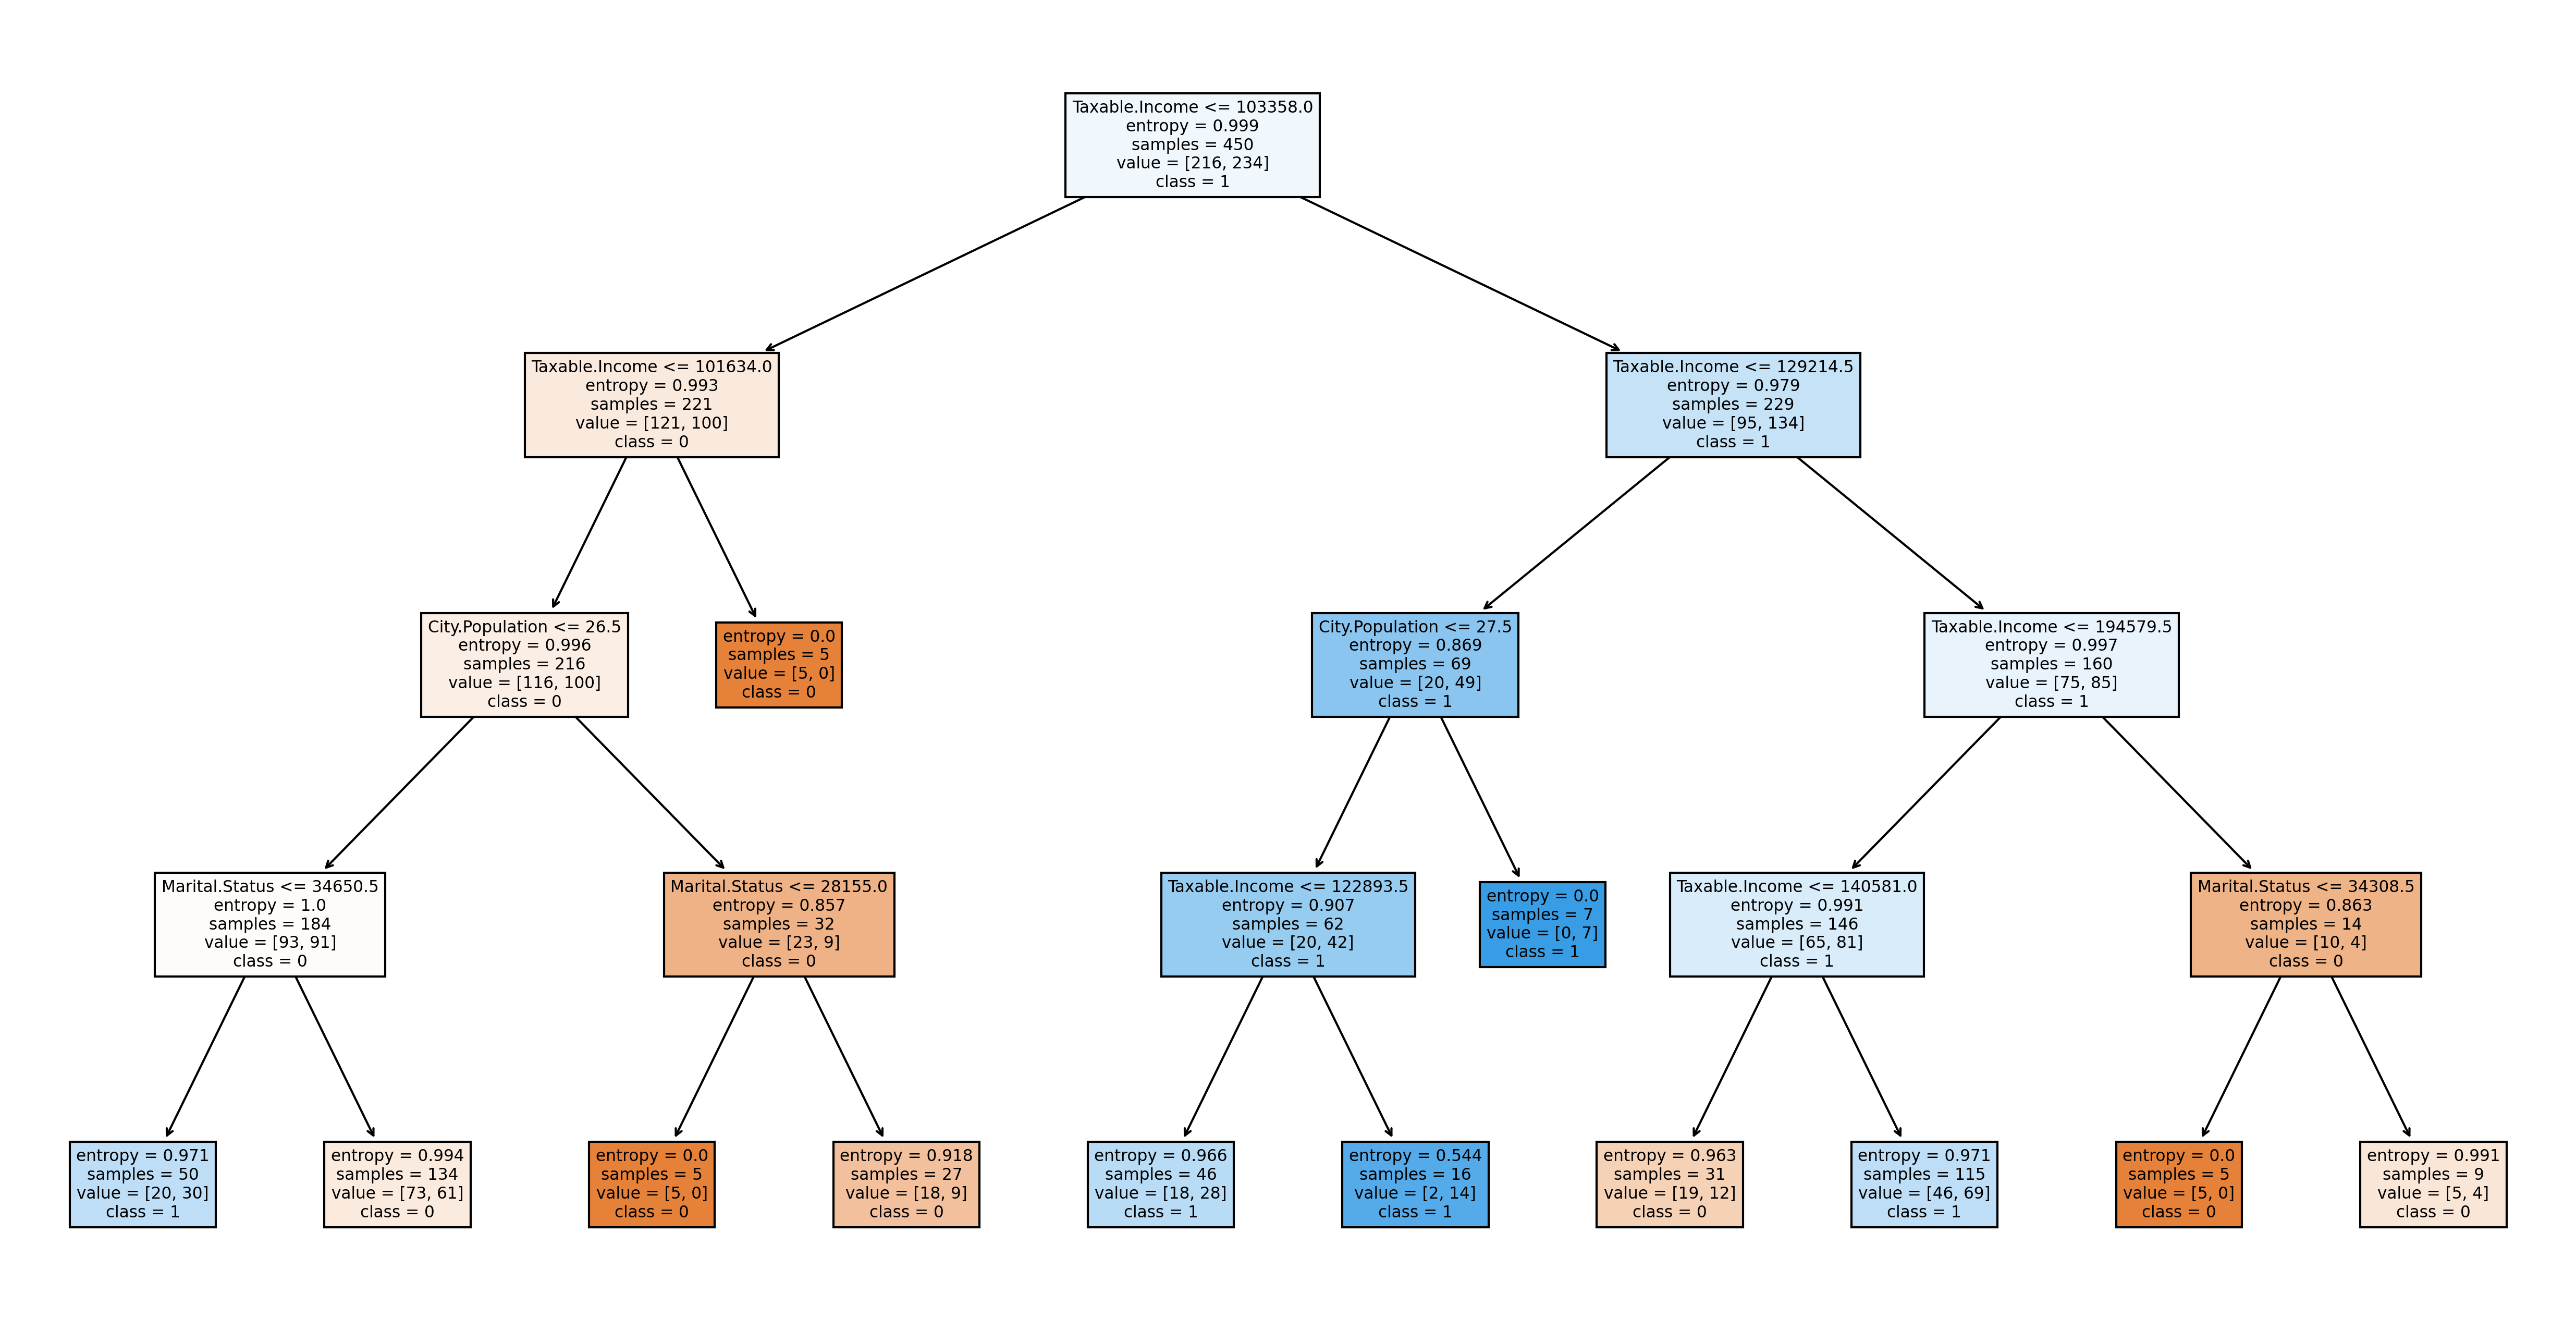

In [14]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience',	
    'Urban']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (21,11), dpi=300)
tree.plot_tree(Fraud_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
preds = Fraud_model.predict(x_test) 
pd.Series(preds).value_counts()

1    84
0    66
dtype: int64

In [16]:
type(y_test)

pandas.core.frame.DataFrame

In [17]:
preds

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [18]:
c1=pd.DataFrame(preds,columns=['Prediction'])
c1

,Prediction
0,1
1,1
2,1
3,1
4,0
...,...
145,1
146,1
147,1
148,0


In [19]:
y_test=y_test.to_numpy() # Data converted to 1d array
y_test=np.reshape(y_test,150)

In [20]:
pd.crosstab(y_test,preds)

col_0,0,1
row_0,,
0,33,39
1,33,45


In [21]:
np.mean(preds==y_test)

0.52

# Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [23]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [24]:
pred=Fraud_model.predict(x_test)
np.mean(preds==y_test)

0.52

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
array = Fraud.values
X = array[:,0:4]
y = array[:,4]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.46, random_state=3)

In [28]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
model.score(X_test,y_test)

-1.2055434286004365